In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

In [4]:
def f(X):
    return np.cos(2*np.pi*X) 

def f_ruido(X):
    '''
    Retorna uma amostra da v.a. Y, fixada uma amostra do v.a. X,
    entregue como parâmetro.
    '''
    return f(X) + np.random.normal(0, 0.5, size = X.shape[0])
    
def sample(n, a = 0):
    '''
    Retorna uma amostra do vetor aleatório (X,Y).
    O parâmetro n é o tamanho da amostra desejada, e o
    valor mean é a média da normal, distribuição de X.
    '''
    p = 0.9
    X = np.concatenate([np.random.beta(2 - a*(2 - 3), 3 - a*(3 - 2), size = int(p*n)),np.random.uniform(0,1, size = int((1-p)*n))])
    Y = f_ruido(X)
    return X.reshape(-1, 1), Y.reshape(-1, 1)

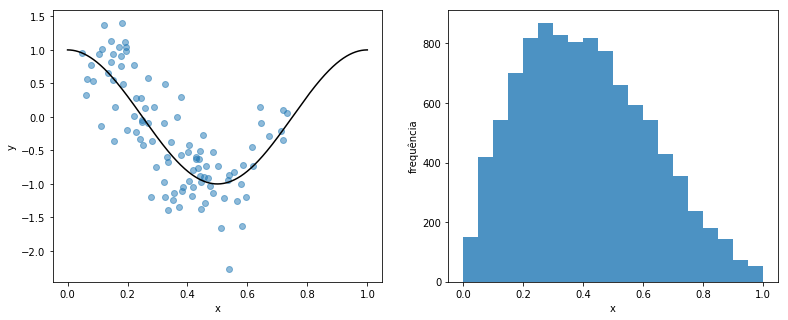

In [5]:
X_past, Y_past = sample(10000)

plt.figure(figsize=(13, 5))
ax = plt.subplot(1, 2, 1)  

aux = np.linspace(0, 1, 1000).reshape(-1, 1)
ax.scatter(X_past[:100], Y_past[:100], alpha = 0.5)
ax.plot(aux, f(aux), c = 'k')
plt.xlabel('x')
plt.ylabel('y')

ax = plt.subplot(1, 2, 2)  
ax.hist(X_past, bins = 20, alpha = 0.8)
plt.xlabel('x')
plt.ylabel('frequência')

# plt.show()
plt.savefig('imagem1.jpg', bbox_inches = 'tight')


$E(Y|X=x)$

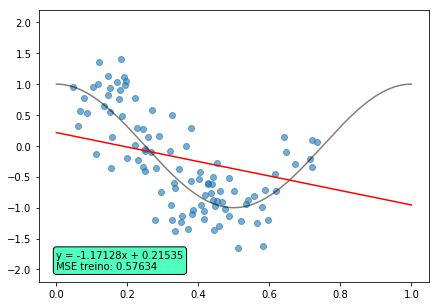

In [6]:
casas_decimais = 5

lr = LinearRegression().fit(X_past, Y_past)

plt.figure(figsize=(7, 5))
ax = plt.subplot(1, 1, 1)  

ax.scatter(X_past[:100], Y_past[:100], alpha = 0.6)
ax.plot(aux, f(aux), c = 'k', alpha = 0.5)
ax.plot(aux, lr.predict(aux), c = 'r')

# print('MSE nos dados treinamento:',)
# print('intercepto: ',lr.intercept_,', coeficiente angular: ',lr.coef_[0])

plt.text(0,-2,'y = '+str(np.round(lr.coef_[0,0],casas_decimais))+'x + '+str(np.round(lr.intercept_[0],casas_decimais))+
         '\nMSE treino: '+str(np.round(mean_squared_error(Y_past, lr.predict(X_past)),casas_decimais)),
         bbox=dict(boxstyle='round', facecolor='#4effc0', alpha=1))
plt.ylim(-2.2,2.2)

# plt.show()
plt.savefig('imagem2.jpg', bbox_inches = 'tight')

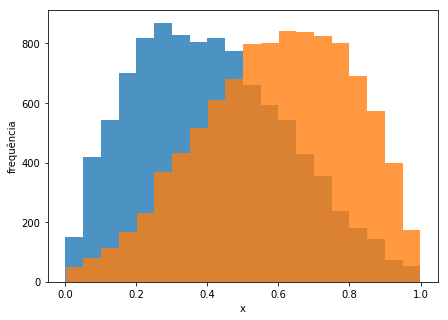

In [7]:
X_new, Y_new = sample(10000, a = 1)

plt.figure(figsize=(7, 5))
ax = plt.subplot(1, 1, 1)  

ax.hist(X_past, bins = 20, alpha = 0.8)
ax.hist(X_new, bins = 20, alpha = 0.8)

plt.xlabel('x')
plt.ylabel('frequência')

# plt.show()
plt.savefig('imagem3.jpg', bbox_inches = 'tight')

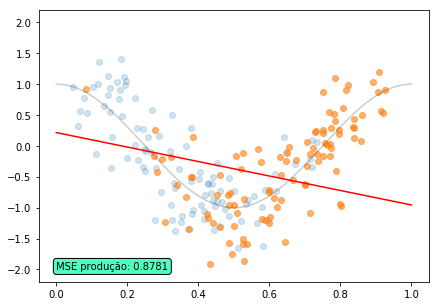

In [8]:
aux = np.linspace(0, 1, 1000).reshape(-1,1)

plt.figure(figsize=(7, 5))
ax = plt.subplot(1, 1, 1)  

ax.scatter(X_past[:100], Y_past[:100], alpha = 0.2)
ax.plot(aux, f(aux), c = 'k', alpha = 0.2)
ax.scatter(X_new[:100], Y_new[:100], alpha = 0.6)
ax.plot(aux, lr.predict(aux), c = 'r')

plt.text(0,-2,'MSE produção: '+str(np.round(mean_squared_error(Y_new, lr.predict(X_new)),casas_decimais)),
         bbox=dict(boxstyle='round', facecolor='#4effc0', alpha=1))
plt.ylim(-2.2,2.2)

# plt.show()
plt.savefig('imagem4.jpg', bbox_inches = 'tight')

## ml for solving ml

In [16]:
pd.DataFrame({'x': list(X_past.reshape(1,-1)[0])+list(X_new.reshape(1,-1)[0]), 'y': list(Y_past.reshape(1,-1)[0])+list(Y_new.reshape(1,-1)[0]) ,'s':[0]*X_past.shape[0]+[1]*X_new.shape[0]}).tail()

,x,y,s
19993,0.018102,1.015659,1
19994,0.893763,1.151972,1
19995,0.997621,1.561989,1
19996,0.828582,0.178078,1
19997,0.323507,-1.320884,1


In [10]:
X_miss = np.asarray(list(X_past.reshape(1,-1)[0])+list(X_new.reshape(1,-1)[0])).reshape(-1,1)
S_miss = np.asarray([0]*X_past.shape[0]+[1]*X_new.shape[0])

In [11]:
log = LogisticRegression().fit(X_miss,S_miss)

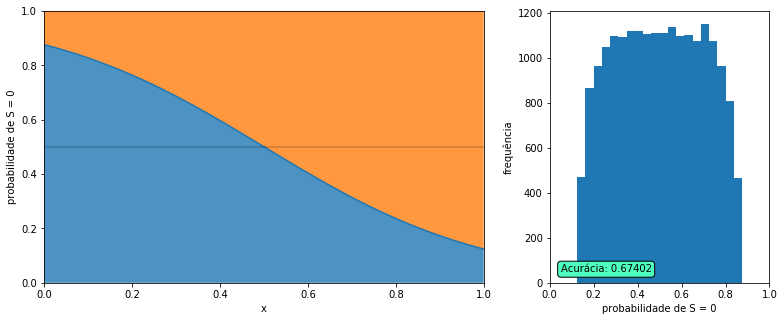

In [12]:

fig = plt.figure(figsize=(13, 5))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[2, 1])

ax0 = fig.add_subplot(spec[0])
ax0.plot(aux,log.predict_proba(aux)[:,0])

ax0.axhline(0.5,c='k',alpha=0.2)
ax0.fill_between(aux[:,0], log.predict_proba(aux)[:,0],alpha=0.8)
ax0.fill_between(aux[:,0], log.predict_proba(aux)[:,0], 1,alpha=0.8)

plt.xlabel('x')
plt.ylabel('probabilidade de S = 0')
plt.xlim(0,1)
plt.ylim(0,1)

ax1 = fig.add_subplot(spec[1])
ax1.hist(log.predict_proba(X_miss)[:,0],bins = 20)

plt.text(0.05,0.05,'Acurácia: '+str(np.round(accuracy_score(S_miss, log.predict(X_miss)),casas_decimais)),
         verticalalignment='center', transform = ax1.transAxes,
         bbox=dict(boxstyle='round', facecolor='#4effc0', alpha=1))

plt.xlabel('probabilidade de S = 0')
plt.ylabel('frequência')
plt.xlim(0,1)

# plt.show()
plt.savefig('imagem5.jpg', bbox_inches = 'tight')

In [13]:
for x in aux:
    if log.predict([x])==1:
            print(x)
            break

[0.5015015]


In [14]:
weights = 1/log.predict_proba(X_past)[:,0]-1

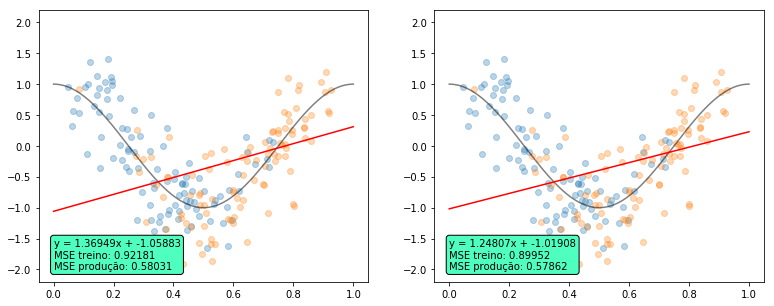

In [15]:
lr_weight = LinearRegression().fit(X_past, Y_past, sample_weight = weights)

plt.figure(figsize=(13, 5))
ax = plt.subplot(1, 2, 1)

ax.scatter(X_past[:100], Y_past[:100], alpha =  0.3)
ax.scatter(X_new[:100], Y_new[:100], alpha = 0.3)
ax.plot(aux, f(aux), c = 'k', alpha = 0.5)
ax.plot(aux, lr_weight.predict(aux), c = 'r')

plt.text(0,-2,'y = '+str(np.round(lr_weight.coef_[0,0],casas_decimais))+'x + '+str(np.round(lr_weight.intercept_[0],casas_decimais))+
         '\nMSE treino: '+str(np.round(mean_squared_error(Y_past, lr_weight.predict(X_past)),casas_decimais))+
         '\nMSE produção: '+str(np.round(mean_squared_error(Y_new, lr_weight.predict(X_new)),casas_decimais)),
         bbox=dict(boxstyle='round', facecolor='#4effc0', alpha=1))
plt.ylim(-2.2,2.2)

##################################################################################

lr_new = LinearRegression().fit(X_new, Y_new)

ax = plt.subplot(1, 2, 2)
ax.scatter(X_past[:100], Y_past[:100], alpha = 0.3)
ax.scatter(X_new[:100], Y_new[:100], alpha = 0.3)
ax.plot(aux, f(aux), c = 'k', alpha = 0.5)
ax.plot(aux, lr_new.predict(aux), c = 'r')

plt.text(0,-2,'y = '+str(np.round(lr_new.coef_[0,0],casas_decimais))+'x + '+str(np.round(lr_new.intercept_[0],casas_decimais))+
         '\nMSE treino: '+str(np.round(mean_squared_error(Y_past, lr_new.predict(X_past)),casas_decimais))+
         '\nMSE produção: '+str(np.round(mean_squared_error(Y_new, lr_new.predict(X_new)),casas_decimais)),
         bbox=dict(boxstyle='round', facecolor='#4effc0', alpha=1))
plt.ylim(-2.2,2.2)

# plt.show()
plt.savefig('imagem6.jpg', bbox_inches = 'tight')

In [2]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x[:600], y[:600], alpha =0.4)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins,alpha=0.6)
    ax_histy.hist(y, bins=bins, orientation='horizontal',alpha=0.6)

In [3]:
def sample(n, t):
    aux = np.random.uniform(-1, 1, size=n)
    aux1 = np.random.normal(0, 0.4, size=n)
    aux2 = np.random.normal(0, 0.4, size=n)
    x1 = aux + aux1
    x2 = t* aux + aux2
    
    return x1, x2

X1,X2 = sample(1000,1)
Y1,Y2 = sample(1000,-1)

C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


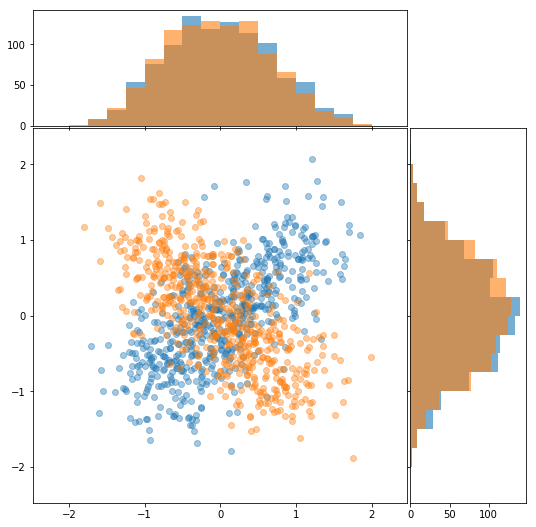

In [4]:
fig = plt.figure(figsize=(8, 8))
for x, y in zip([X1,Y1],[X2,Y2]):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a square Figure


    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax, alpha = 0.8)
    ax_histy = fig.add_axes(rect_histy, sharey=ax, alpha = 0.8)

    # use the previously defined function
    scatter_hist(x, y, ax, ax_histx, ax_histy)

# plt.show()

plt.savefig('imagem7.jpg', bbox_inches = 'tight')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [2]:
def kernel(x,y):
    return np.exp(-(x-y)**2/0.1)

In [24]:
def kde(x, S):
    auxiliar = 0
    for s in S:
        auxiliar+=kernel(x,s)
    return auxiliar

In [38]:
S = [-1.1, -0.3, 0.2, 0.5]

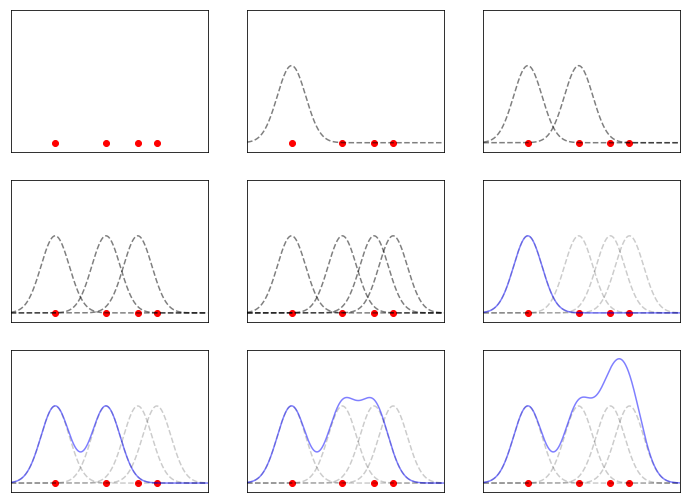

In [55]:
x = np.linspace(-1.8,1.3,1000)
plt.figure(figsize=(12, 12))

ax = plt.subplot(4, 3, 1)
plt.scatter(S,[0]*len(S),c='r')
plt.ylim(-0.03,0.43)
plt.xlim(-1.8,1.3)
plt.xticks([])
plt.yticks([])

for i in range(1,len(S)+1):
    ax = plt.subplot(4, 3, 1+i)
    plt.scatter(S,[0]*len(S),c='r')
    for t in range(i):
            plt.plot(x,kernel(x,S[t])/len(S),'--k',alpha=0.5)
    plt.ylim(-0.03,0.43)
    plt.xlim(-1.8,1.3)
    plt.xticks([])
    plt.yticks([])


# ax = plt.subplot(4, 3, 2)
# plt.scatter(S,[0]*len(S),c='r')
# for t in range(len(S)):
#         plt.plot(x,kernel(x,S[t])/len(S),'--k',alpha=0.5)
# plt.ylim(-0.01,0.35)
# plt.xticks([])
# plt.yticks([])

for i in range(1,len(S)+1):
    ax = plt.subplot(4, 3, 5+i)
    plt.scatter(S,[0]*len(S),c='r')
    for t in range(len(S)):
            plt.plot(x,kernel(x,S[t])/len(S),'--k',alpha=0.2)
    plt.ylim(-0.03,0.43)
    plt.xlim(-1.8,1.3)
    plt.plot(x,kde(x,S[:i])/len(S),'b',alpha=0.5)
    plt.xticks([])
    plt.yticks([])
    

plt.savefig('kde.jpg', bbox_inches = 'tight')

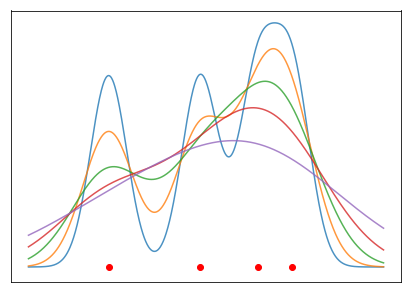

In [72]:
plt.figure(figsize=(7, 5))
ax = plt.subplot(1, 1, 1) 

for i in [0.05, 0.1, 0.2, 0.4, 1]:
    def kernel(x,y):
        return np.exp(-(x-y)**2/i)
    plt.plot(x,1/(np.sqrt(i))*kde(x,S)/len(S),alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.scatter(S,[0]*len(S),c='r')
plt.savefig('kde_problem.jpg', bbox_inches = 'tight')